In [36]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from scipy.fftpack import fft, fftshift
from scipy.signal import spectrogram

In [39]:
from scipy.io import wavfile
Fs, data = wavfile.read('PinkPanther60.wav')

In [44]:
T = 1/Fs                # Sampling period (or sampling interval)
N = len(data)           # Total data points (signal length)

t = np.arange(0, N)*T   # Time vector (time range)

k = np.arange(0, N)     # vector from 0 to N-1
f = (Fs/N)*k            # frequency range

In [45]:
t = np.arange(0, N)*T   # Time vector (time range)

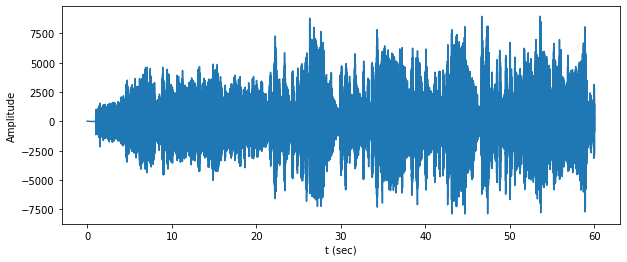

In [46]:
x = data

plt.figure(figsize = (10, 4))
plt.plot(t,x)
plt.xlabel('t (sec)')
plt.ylabel('Amplitude')
plt.show()

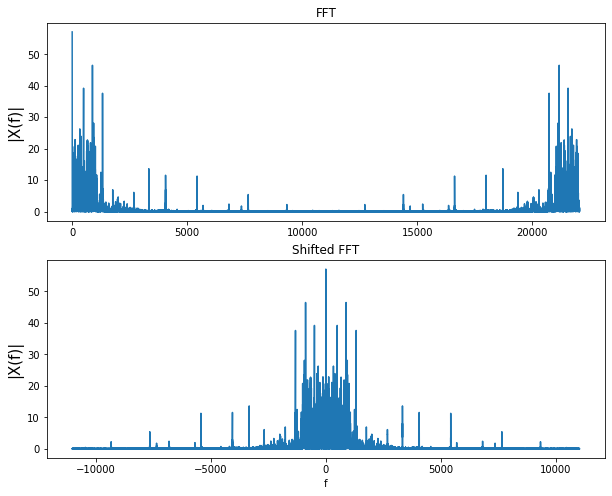

In [50]:
# original fft

xt = fft(x)/N
xtshift = fftshift(xt)

kr = np.hstack([np.arange(0, N/2), np.arange(-N/2, 0)])
fr = (Fs/N)*kr
fs = fftshift(fr)

plt.figure(figsize = (10,8))

plt.subplot(2,1,1)
plt.plot(f, np.abs(xt))
plt.ylabel('|X(f)|', fontsize = 15)
# plt.ylim([0, 2.1])
# plt.xlim([0, 1000])
plt.title('FFT')

plt.subplot(2,1,2)
plt.plot(fs, np.abs(xtshift))
# plt.ylim([0, 2.1])
# plt.xlim([-500, 500])
plt.xlabel('f')
plt.ylabel('|X(f)|', fontsize = 15)
plt.title('Shifted FFT')
plt.show()

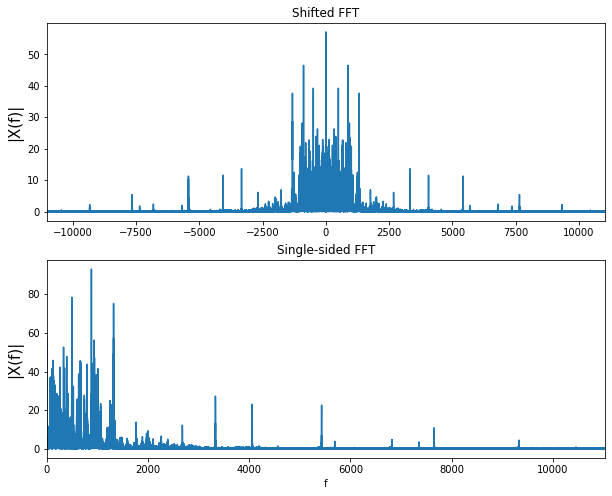

In [52]:
# single-sides fft

xt = fft(x)/N
xtss = xt[0:int(N/2)+1]      # 0:N/2
xtss[1:-1] = 2*xtss[1:-1]

fss = f[0:int(N/2)+1]

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(fs, np.abs(xtshift))
plt.ylabel('|X(f)|', fontsize = 15)
# plt.ylim([0, 2.1])
plt.xlim([np.min(fs), np.max(fs)])
plt.title('Shifted FFT')

plt.subplot(2,1,2)
plt.plot(fss, np.abs(xtss))
plt.xlim([np.min(fss), np.max(fss)])
plt.xlabel('f')
plt.ylabel('|X(f)|', fontsize = 15)
# plt.ylim([0, 2.1])
plt.title('Single-sided FFT')
plt.show()

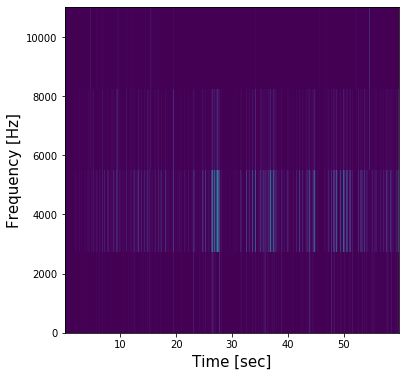

In [62]:
windowsize = 2**3
window = np.hanning(windowsize)
nfft = windowsize
noverlap = windowsize/2

f, t, Sxx = spectrogram(x, 
                        Fs, 
                        window = window, 
                        noverlap = noverlap, 
                        nfft = nfft, 
                        scaling = 'spectrum', 
                        mode = 'psd')

plt.figure(figsize = (6, 6))

plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]', fontsize = 15)
plt.xlabel('Time [sec]', fontsize = 15)
plt.show()